Уже идёт весна, и ваш руководитель курса по питону Николай трясётся под одеялом, т.к. у него аллергия на цветение берёзы. Уже скоро будут чесаться глаза и потечёт ручей...


Помогите ему собрать новую аптечку, чтобы пережить апрель и май :)

# Часть 1. Анализ датасетов. 1 балл.

На диске в папке "Домашние задания" лежат три таблички в формате csv с товарами в разных аптеках.

Загрузи их в этот ноутбук и изучи. Ответь на следующие вопросы:
- Какие есть столбцы в этих датафреймах?
- Сколько значений в каждом датафрейме? Есть ли повторы внутри каждого датафрейма и между датафреймами?
- Все ли ячейки заполнены? Если нет, можем ли мы их заполнить?

In [1]:
#Подключаем библиотеку для работы с таблицей
import pandas as pd

In [2]:
# Чтение файлов
pharmacy1 = pd.read_csv('pharmacy1.csv')
pharmacy2 = pd.read_csv('pharmacy2.csv')
pharmacy3 = pd.read_csv('pharmacy3.csv')

# Просмотр файлов

print(pharmacy1.columns.tolist())
print(pharmacy2.columns.tolist())
print(pharmacy3.columns.tolist())

#Столбцы во всех таблицах
pharmacy2

['Unnamed: 0', 'Наименование', 'Магазин № 3', 'Магазин № 4', 'Магазин № 5', 'Магазин № 6', 'Магазин № 7', 'Магазин № 8', 'Магазин № 9']
['Unnamed: 0', 'Наименование', 'Цена', 'Производитель']
['Unnamed: 0', 'Наименование', 'Цена', 'Производитель']


,Unnamed: 0,Наименование,Цена,Производитель
0,0,Аллегра таб. п/о 120мг №10,787 ₽,Опелла Хелскеа
1,1,Аллегра таб. п/о 180мг №10,911 ₽,Опелла Хелскеа
2,2,Аллервэй таб. п/о 5мг №10,351 ₽,Др.Реддис
3,3,Аллервэй таб. п/о 5мг №30,619 ₽,Др.Реддис
4,4,Аллервэй Экспресс таб. дисперг. в полости рта ...,493 ₽,Др.Реддис
...,...,...,...,...
159,159,Сингуляр таб. жев. 5мг №14,1 352 ₽,Органон
160,160,Сингуляр таб. жев. 5мг №28,1 870 ₽,Органон
161,161,Сингуляр таб. п/о 10мг №28,1 834 ₽,Органон
162,162,Эуфиллин таб. 150мг №30,34 ₽,Фармстандарт


In [3]:
#размер фрейма
print(pharmacy1.shape)

print(pharmacy2.shape)

print(pharmacy3.shape)

#Явно попросили размер всех таблиц

(598, 9)
(164, 4)
(93, 4)


In [4]:
#наличие повторов внутри

print(pharmacy1.duplicated().any())
print(pharmacy2.duplicated().any())
print(pharmacy3.duplicated().any())
#Повторов нет...

False
False
False


In [5]:
#наличие повторов между 2 и 3 аптекой, 1 из-за размера не рассматриваем

concat23 = pd.concat([pharmacy1, pharmacy2])
print(concat23.duplicated().any())

#Аналогичная проверка для конкатинированной таблицы показывает 0 повторов

False


In [6]:
#проверка на пустоту
print(pharmacy1.isnull().sum(), '\n')
print(pharmacy2.isnull().sum(), '\n')
print(pharmacy3.isnull().sum())
#Из результатов видно, что в 1 таблице во многих строках отсутсвуют названия магазинов, в 3 отсутвует в 4 продуктах цена.
#В первом случае, заполнение пропусков труднозатратно, а в зависимости от цели данных мы не можем сказать,
#стоит ли их "спасать". В третьей таблице всего 4 пропуска можем запросить значения.



Unnamed: 0        0
Наименование      0
Магазин № 3     505
Магазин № 4     476
Магазин № 5     498
Магазин № 6     511
Магазин № 7     526
Магазин № 8     527
Магазин № 9     538
dtype: int64 

Unnamed: 0       0
Наименование     0
Цена             0
Производитель    0
dtype: int64 

Unnamed: 0       0
Наименование     0
Цена             4
Производитель    0
dtype: int64


# Часть 2. Визуализация. 2 балла.

Построй минимум 5 **различных** информативных графиков, основанных на данных в табличках.

Не забудь:
- подписать оси
- подписать название
- сохранять информативность графиков.

Какую информацию о ценах в аптеках можно получить из этих графиков?

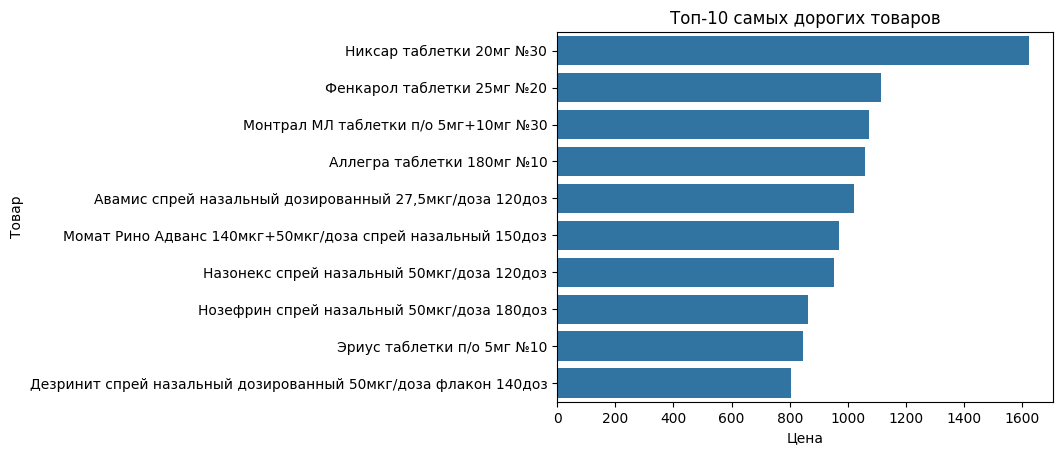

In [7]:
#библиотеки для графиков
import matplotlib.pyplot as plt
import seaborn as sns

#сделаем график топ 10 лекарств цене для 3 аптеки
#удалим NaN'ы
#график1
pharmacy3 = pharmacy3.dropna(subset=['Цена'])
pharmacy3['Цена'] = pharmacy3['Цена'].str.replace(' руб', '').astype(float)
top_10_expensive = pharmacy3.nlargest(10, 'Цена')
sns.barplot(
    data=top_10_expensive,
    y='Наименование',
    x='Цена',
    orient='h'
)
plt.title("Топ-10 самых дорогих товаров")
plt.xlabel("Цена")
plt.ylabel("Товар")
plt.show()



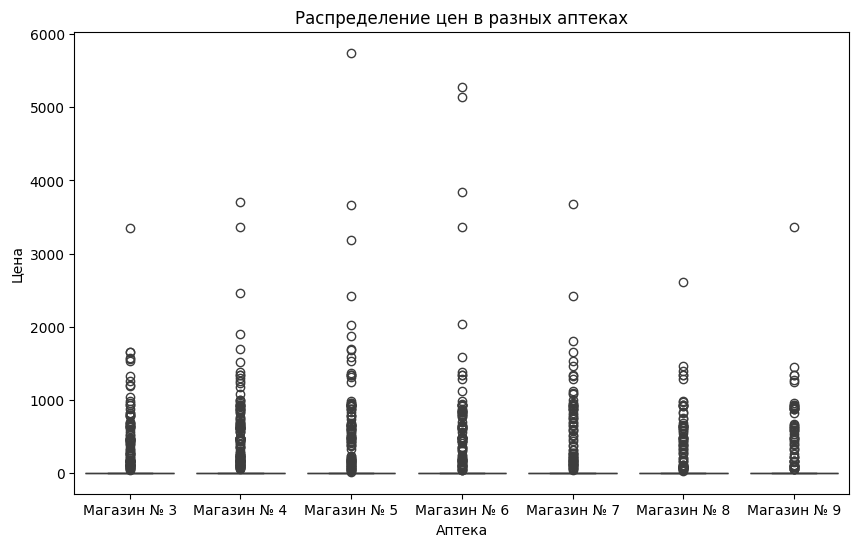

In [8]:
#график2
#берем цену из всех магазинов
pharmacy1 = pharmacy1.fillna(0) #пустые значения будем считать 0
price_columns = [col for col in pharmacy1.columns if "Магазин" in col]

plt.figure(figsize=(10, 6))
sns.boxplot(data=pharmacy1[price_columns])
plt.title("Распределение цен в разных аптеках")
plt.xlabel("Аптека")
plt.ylabel("Цена")
plt.show()

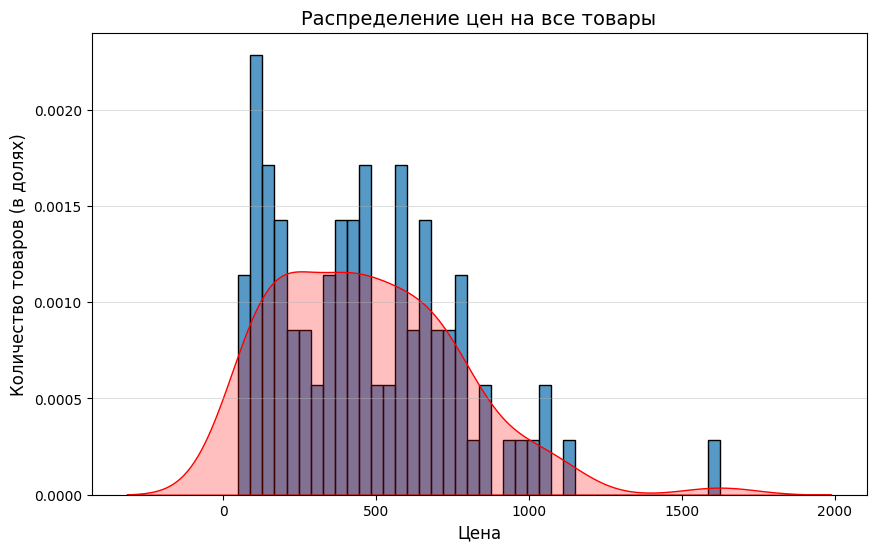

In [9]:
#график 3

plt.figure(figsize=(10, 6))
sns.histplot(pharmacy3['Цена'], bins=40, stat='density')
sns.kdeplot(pharmacy3['Цена'], fill=True, color="red")
plt.title('Распределение цен на все товары', fontsize=14)
plt.xlabel('Цена', fontsize=12)
plt.ylabel('Количество товаров (в долях)', fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.show()


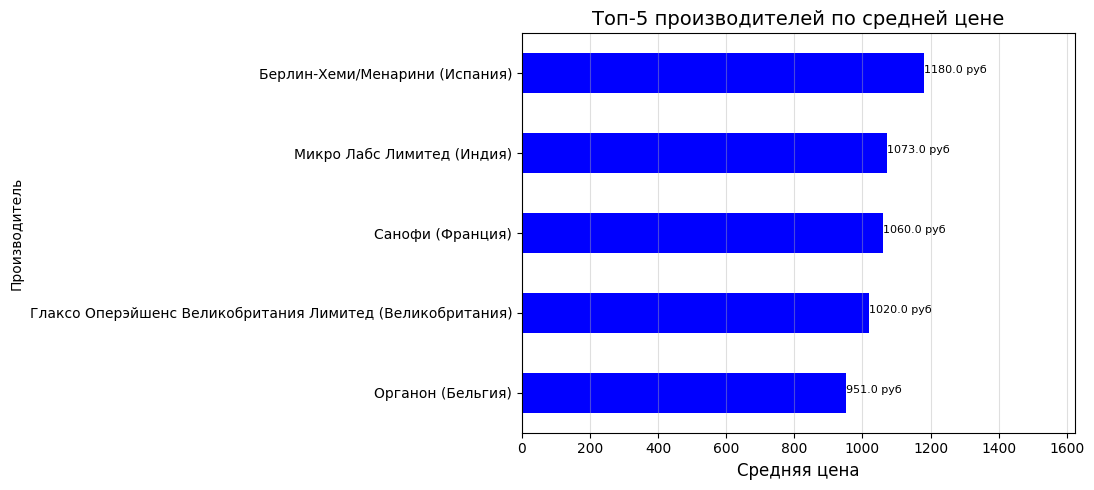

In [10]:
#график 4

producer_prices = pharmacy3.groupby('Производитель')['Цена'].mean().nlargest(5)

plt.figure(figsize=(11, 5))
producer_prices.sort_values().plot(kind='barh', color='blue')
plt.title('Топ-5 производителей по средней цене', fontsize=14)
plt.xlabel('Средняя цена', fontsize=12)
plt.grid(axis='x', linestyle='-', alpha=0.4)

for i, price in enumerate(producer_prices.sort_values()):
    plt.text(price, i, f'{price} руб', fontsize=8)
max_value = pharmacy3['Цена'].max()
plt.xlim(0, max_value)
plt.tight_layout()
plt.show()

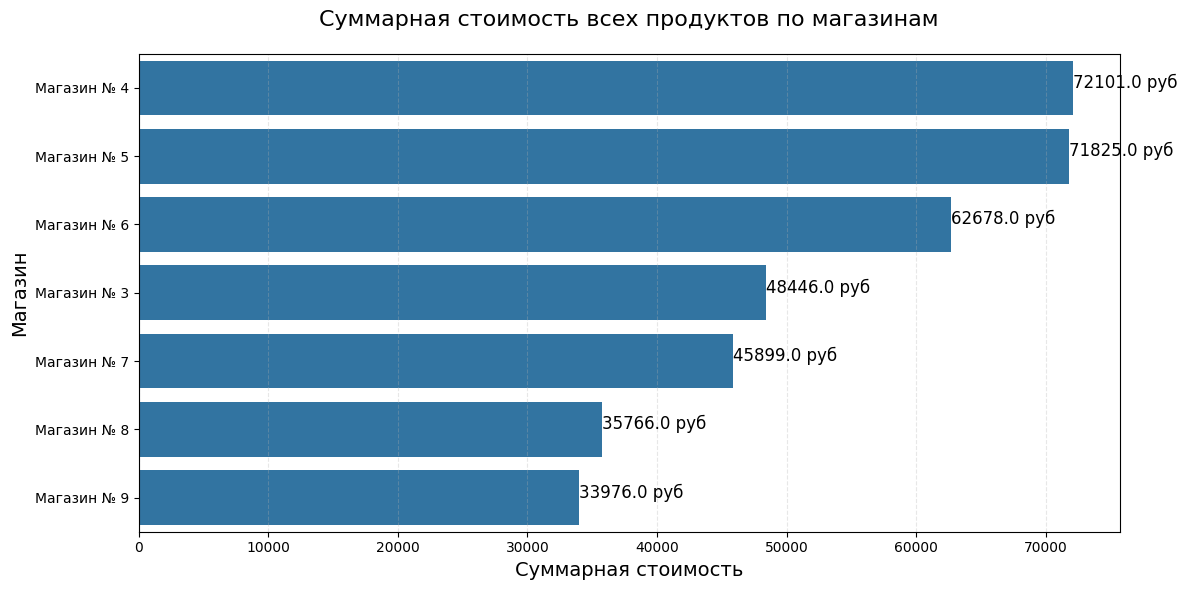

In [11]:
#график 5

total_values = pharmacy1[price_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=total_values.values, y=total_values.index)
plt.title('Суммарная стоимость всех продуктов по магазинам', fontsize=16, pad=20)
plt.xlabel('Суммарная стоимость', fontsize=14)
plt.ylabel('Магазин', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.3)
for i, value in enumerate(total_values):
    ax.text(value, i, f'{value} руб', fontsize=12)
plt.tight_layout()
plt.show()

# Часть 3. Поиск пересечений по лекарствам через параметры. 3 балла.

Попробуй вычленить параметры из названия, которые однозначно определяют лекарство. Возьми 3 датафрейма и сформируй новые столбцы с этими параметрами, после чего попробуй найти пересечения.

**Пример:**

Лекарства "Ойнеболи 10 таблеток 2 мг" и "Ойнеболи 2 мг 10 таблеток" это одинаковые позиции.

Лекарства "Ойнеболи 20 таблеток 2 мг", "Ойнеболи 10 таблеток 2 мг" и "Ойнеболи 10 таблеток 5 мг" попарно различны.

**Сколько пересечений получилось? Были ли ошибочные пересечения? Все ли пересечения получилось найти таким образом? Сопоставимы ли цены в разных аптеках на эти позиции? Какие позиции есть в каждой из аптек?**

Используя [matplotlib-venn](https://pypi.org/project/matplotlib-venn/) построй диаграмму Венна, подпиши её, укажи какой круг за какую аптеку отвечает и отметь количество позиций в каждом из подмножеств.

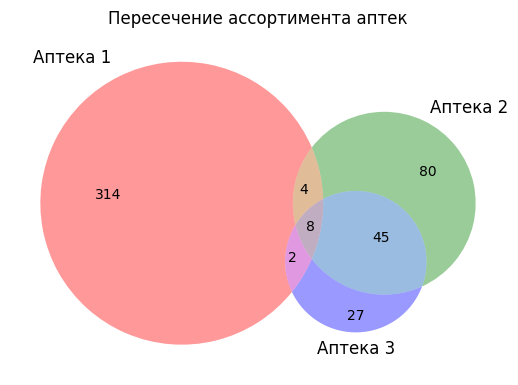

In [13]:
from matplotlib_venn import venn3
import re

def extract_parameters(name):
    # Извлечение дозировки
    dosage = re.search(r"(\d+\.?\d*)\s*(?:мг|г|мл|л|ME|ЕД|доз)", name, re.IGNORECASE)
    dosage = dosage.group(1) if dosage else None

    # Извлечение количества
    quantity = re.search(
      r"(?:N|№|\b)(\d+)\s*(?:таб|шт|мл|г|доз|кап|амп|фл)?\b",
      name,
      re.IGNORECASE
    )
    quantity = quantity.group(1) if quantity else None

    # Извлечение названия (первое слово)
    normalized_name = re.search(r"^([^\d\W]+)", name, re.UNICODE)
    normalized_name = normalized_name.group(1).strip(" ,.-") if normalized_name else name.split()[0]

    return normalized_name, dosage, quantity

for df in [pharmacy1, pharmacy2, pharmacy3]:
    df[["normalized_name", "dosage", "quantity"]] = df["Наименование"].apply(
        lambda x: pd.Series(extract_parameters(x))
    )

for df in [pharmacy1, pharmacy2, pharmacy3]:
    df["unique_id"] = df["normalized_name"] + "|" + df["dosage"].astype(str) + "|" + df["quantity"].astype(str)

venn3(
    [set(pharmacy1["unique_id"]), set(pharmacy2["unique_id"]), set(pharmacy3["unique_id"])],
    set_labels=("Аптека 1", "Аптека 2", "Аптека 3")
)
#значения для части 4
pharmacy1 = pharmacy1.drop_duplicates(subset="unique_id")
pharmacy2 = pharmacy2.drop_duplicates(subset="unique_id")
pharmacy3 = pharmacy3.drop_duplicates(subset="unique_id")
intersection12 = set(pharmacy1["unique_id"]) & set(pharmacy2["unique_id"]) - set(pharmacy3["unique_id"])
intersection13 = set(pharmacy1["unique_id"]) & set(pharmacy3["unique_id"]) - set(pharmacy2["unique_id"])
intersection23 = set(pharmacy2["unique_id"]) & set(pharmacy3["unique_id"]) - set(pharmacy1["unique_id"])
true_pharmacy12 = pharmacy2[pharmacy2["unique_id"].isin(intersection12)]
true_pharmacy13 = pharmacy1[pharmacy1["unique_id"].isin(intersection13)]
true_pharmacy23 = pharmacy3[pharmacy3["unique_id"].isin(intersection23)]
plt.title("Пересечение ассортимента аптек")
plt.show()

Все пересечния представлены на диаграмме. Все пересечения таким методом нельзя найти, так как мы не знаем точный формат записи товара(например, в таблицах встерчаются товары без указания второго числа). При таком подходе появляются много лишних пересечний. Например, Эзлор Солюшн Таблетс 5мг таб. дисперг. №10 из 2 таблицы и Эзлор, 5 мг, таблетки, покрытые пленочной оболочкой, 10 шт. из первой таблицы будут считаться одинаковыми. (Если считать полностью названия, то пересечений практически не будет и задача не имеет смысла)


# Часть 4. Поиск пересечений по лекарстам через N-грамы. 5 баллов.

Теперь попробуем чуть более универсальный способ поиска.

Для простоты будем считать, что в части 3 ты нашёл 100% совпадений и все они корректны (если это не так, то надо, чтобы процент реальных совпадений был выше 95%)

Построй [n-грамы](https://en.wikipedia.org/wiki/N-gram) для названий лекарств (n = 1, 2, 3, 4, 5). Давай считать, что если множества n-грам совпадают на `threshold` долю, то эти позиции совпадающие, а если нет - нет.

Подбери возможные `threshold`ы для различных n.

Визуализируй результаты при помощи matplotlib-venn и для каждого n определи точность. Какой n и `threshold` лучше взять для такого метода, исходя из твоих экспериментов?

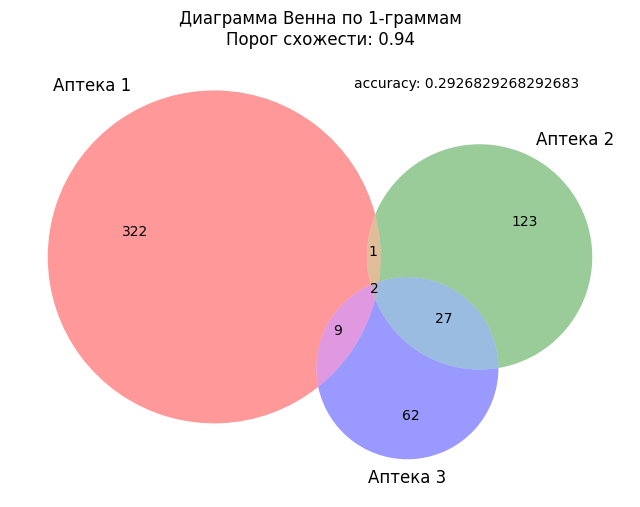

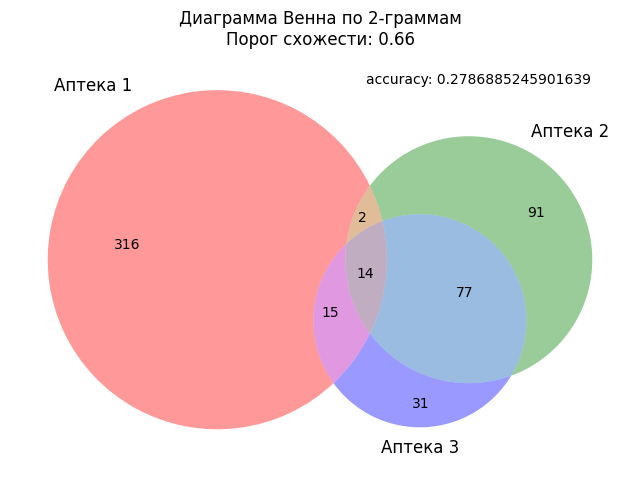

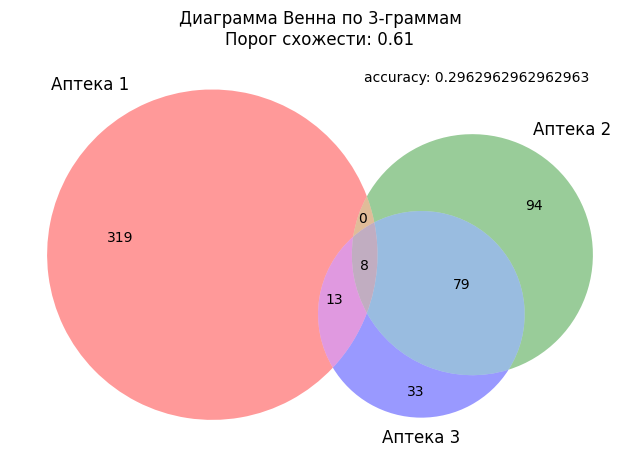

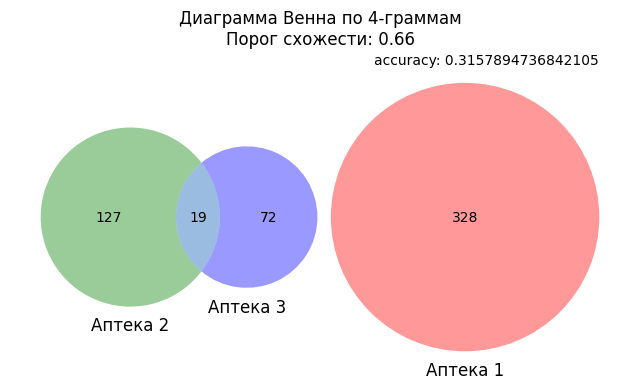

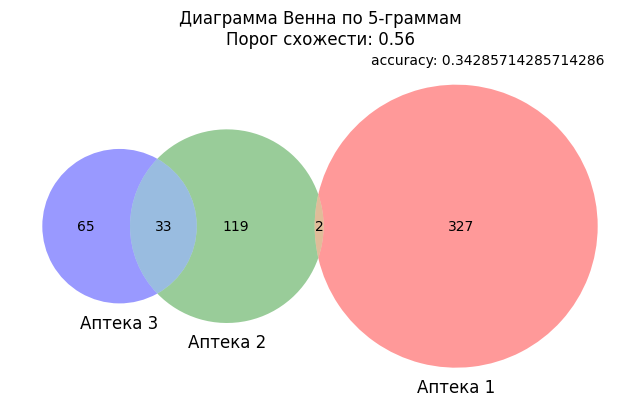

0.34285714285714286

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt

def normalize_text(text):
    text = text.lower()
    # Форматируем, чтобы получить больше точности
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def generate_ngrams(text, n=2):
    words = text.split()  # Разбиваем текст на слова
    ngrams_list = []
    for i in range(len(words) - n + 1):
        ngrams_list.append(tuple(words[i:i + n]))  # Добавляем n-грамму в виде кортежа
    return ngrams_list

def clean_text(text):
    """Базовая очистка текста"""
    text = text.lower()
    text = re.sub(r'[^\w]', '', text)
    return text

def char_ngrams(text, n=3):
    """Генерация символьных N-грамм"""
    text = clean_text(text)
    return [text[i:i+n] for i in range(len(text)-n+1)]

def ngram_similarity(str1, str2, n=3, threshold=0.7):
    ngrams1 = set(char_ngrams(str1, n))
    ngrams2 = set(char_ngrams(str2, n))
    if not ngrams1 or not ngrams2:
        return False
    similarity = len(ngrams1 & ngrams2) / max(len(ngrams1), len(ngrams2), 1)
    return similarity >= threshold
def calculate_simple_intersection_accuracy(true_12, true_13, true_23, pred_12, pred_13, pred_23):
    correct = 0
    total = 0

    for true, pred in [(true_12, pred_12), (true_13, pred_13), (true_23, pred_23)]:
        # Верно предсказанные совпадения
        correct += len(true & pred)
        # Все возможные совпадения
        total += len(pred)

    return correct / total if total > 0 else 0
# Фиксирую threshold и смотрю все n - граммы
def plot_char_ngram_venn(pharmacy1, pharmacy2, pharmacy3, n, threshold=1):
    names1 = set(pharmacy1['Наименование'])
    names2 = set(pharmacy2['Наименование'])
    names3 = set(pharmacy3['Наименование'])

    # Находим все схожие названия
    similar_12 = {(n1,n2) for n1 in names1 for n2 in names2
                 if ngram_similarity(n1, n2, n, threshold)}
    unpacked_names12 = {n1 for n1, n2 in similar_12} | {n2 for n1, n2 in similar_12}
    similar_13 = {(n1,n3) for n1 in names1 for n3 in names3
                 if ngram_similarity(n1, n3, n, threshold)}
    unpacked_names13 = {n1 for n1, n3 in similar_13} | {n3 for n1, n3 in similar_13}
    similar_23 = {(n2,n3) for n2 in names2 for n3 in names3
                 if ngram_similarity(n2, n3, n, threshold)}
    unpacked_names23 = {n2 for n2, n3 in similar_23} | {n3 for n2, n3 in similar_23}
    accuracy = calculate_simple_intersection_accuracy(set(true_pharmacy12['Наименование']), set(true_pharmacy13['Наименование']), set(true_pharmacy23['Наименование']), unpacked_names12, unpacked_names13, unpacked_names23)
    # Формируем множества для диаграммы
    for elem in similar_12:
      names1.add(elem[1])
      names2.add(elem[0])
    for elem in similar_13:
      names1.add(elem[1])
      names3.add(elem[0])
    for elem in similar_23:
      names2.add(elem[1])
      names3.add(elem[0])


    #Строим диаграмму
    plt.figure(figsize=(8, 8))
    venn3([names1, names2, names3],
          set_labels=('Аптека 1', 'Аптека 2', 'Аптека 3'))

    plt.title(f'Диаграмма Венна по {n}-граммам\nПорог схожести: {threshold}')
    plt.text(0.1, 0.5, f'accuracy: {accuracy}')
    plt.show()
    return accuracy
#Отрисуем и выведем accuracy

plot_char_ngram_venn(pharmacy1, pharmacy2, pharmacy3,
                    1, threshold=0.94)
plot_char_ngram_venn(pharmacy1, pharmacy2, pharmacy3,
                    2, threshold=0.66)
plot_char_ngram_venn(pharmacy1, pharmacy2, pharmacy3,
                     3, threshold=0.61)
plot_char_ngram_venn(pharmacy1, pharmacy2, pharmacy3,
                     4, threshold=0.66)
plot_char_ngram_venn(pharmacy1, pharmacy2, pharmacy3,
                     5, threshold=0.56)





Здесь я сделал диаграммы для каждой n-граммы с заданным значением. Перебрав различные threeshold'ы, нашел максимальное accuracy для каждого n с диаграммой из части 3. У меня вышло, что


# Часть 5. Анализ проделанной работы. 1 балл.

В этой части тебе надо:

- проанализировать цены на совпадающие позиции. В какой аптеке лучше закупаться? Есть ли существенная разница между аптеками?
- сравни предложенные методы в частях 3 и 4. Если бы у тебя были датасеты 30 аптек по всем возможным позициям, какой бы способ ты выбрал для поиска пересекающихся товаров?

In [15]:
set1 = set(pharmacy1["unique_id"].dropna())
set2 = set(pharmacy2["unique_id"].dropna())
set3 = set(pharmacy3["unique_id"].dropna())
selected_stores = ['Магазин № 3', 'Магазин № 4', 'Магазин № 5', 'Магазин № 6', 'Магазин № 7', 'Магазин № 8', 'Магазин № 9']
pharmacy1['Минимальная цена'] = pharmacy1[selected_stores].min(axis=1)
intersections = {
    "Только Аптека 1": set1 - set2 - set3,
    "Только Аптека 2": set2 - set1 - set3,
    "Только Аптека 3": set3 - set1 - set2,
    "Аптека 1 и 2": set1 & set2 - set3,
    "Аптека 1 и 3": set1 & set3 - set2,
    "Аптека 2 и 3": set2 & set3 - set1,
    "Все три аптеки": set1 & set2 & set3
}

intersection_table = pd.DataFrame([
    {"Категория": key, "Количество": len(value), "Препараты": ", ".join(value) if value else "-"}
    for key, value in intersections.items()
])

print("Таблица пересечений ассортимента:")
display(intersection_table)

common_drugs = set1 & set2 & set3
print("Сравнение цен")
price_comparison = []
for drug in common_drugs:
    price1 = pharmacy1[pharmacy1["unique_id"] == drug]["Минимальная цена"].values[0]
    price2 = pharmacy2[pharmacy2["unique_id"] == drug]["Цена"].values[0]
    price3 = pharmacy3[pharmacy3["unique_id"] == drug]["Цена"].values[0]
    price_comparison.append({
        "Препарат": drug,
        "Аптека 1": price1,
        "Аптека 2": price2,
        "Аптека 3": price3
    })
display(pd.DataFrame(price_comparison).dropna())


Таблица пересечений ассортимента:


,Категория,Количество,Препараты
0,Только Аптека 1,314,"Гленцет|5|5, Фенивейт|15|0, Ломилан|5|5, Акрид..."
1,Только Аптека 2,80,"Пипольфен|25|2, Монтелар|5|14, Сальбутамол|200..."
2,Только Аптека 3,27,"Зиртек|20|20, Момат|60|60, Хлоропирамин|25|20,..."
3,Аптека 1 и 2,4,"Ломилан|10|10, Фенистил|8|0, Галиум|30|30, Цет..."
4,Аптека 1 и 3,2,"Эльцет|5|5, Диметинден|50|0"
5,Аптека 2 и 3,45,"Хлоропирамин|20|1, Гистан|30|30, Лоратадин|10|..."
6,Все три аптеки,8,"Лоратадин|10|10, Эспа|10|10, Фенистил|30|0, Фе..."


Сравнение цен


,Препарат,Аптека 1,Аптека 2,Аптека 3
0,Лоратадин|10|10,0.0,129 ₽,145.9
1,Эспа|10|10,0.0,472 ₽,469.0
2,Фенистил|30|0,0.0,608 ₽,582.0
3,Фенистил|50|0,0.0,830 ₽,790.0
4,Псило|20|20,0.0,418 ₽,448.0
5,Кестин|10|10,0.0,659 ₽,677.0
6,Кларитин|10|10,0.0,142 ₽,159.2
7,Зодак|10|10,0.0,115 ₽,120.0


Аптеки в пересекающихся товарах сильно различаются в ценах. Самой дешевой относительно всех товаров из таблицы видно, что вторая. Для 30 таблиц я бы выбрал метод n-грамм, поскольку он будет правильно отвечать (в общем случае), если наименования будут записаны по-другому. В такой ситуации лучше пожертовать временем работы, чем получить меньше пересечений.


